
#Graph methods for imaging, Vision and computing (B31RX) 2023

##Tutorial 4: Gaussian mixture model (GMM) clustering and the Expectation-
Maximization algorithm

In this tutorial, we will investigate a clustering method relying on a Gaussian mixture
model (GMM) and an algorithm to train the corresponding classifier, namely the
Expectation-Maximization algorithm.

In contrast to K-Means, the GMM clustering algorithm assumes that the clusters
have parametric shapes, i.e., (multivariate) Gaussian distributions. This algorithm
has a Bayesian interpretation and learns the cluster parameters by maximum
marginal likelihood estimation (MMLE) or marginal maximum a posteriori (MMAP)
estimation. In this tutorial, we will use MMLE estimation. Thanks to its Bayesian
formulation, it provides not only estimated labels for each sample, but also
membership probabilities, i.e., for each sample, the probabilities of belonging to each
cluster.

Moreover, this clustering is appropriate when the different clusters have: 1) different
shapes and 2) different numbers of samples per class.

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

##Question 9:

Implementation: Create a new python environment to run the python code provided.
We will use the GMM-based clustering available in the scikit-learn library (https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn).

First create data to form 3 3-dimensional clusters as follows

- Cluster 1: 1000 points, cluster mean [1,1,1], covariance matrix 0.25 $\mathbf{I}_3$
- Cluster 2: 300 points, cluster mean [5,5,5], covariance matrix $\mathbf{I}_3$
- Cluster 3: 100 points, cluster mean [10,3,10], covariance matrix 0.01 $\mathbf{I}_3$

Note: you can use the function np.random.randn() to generate Gaussian random
samples.

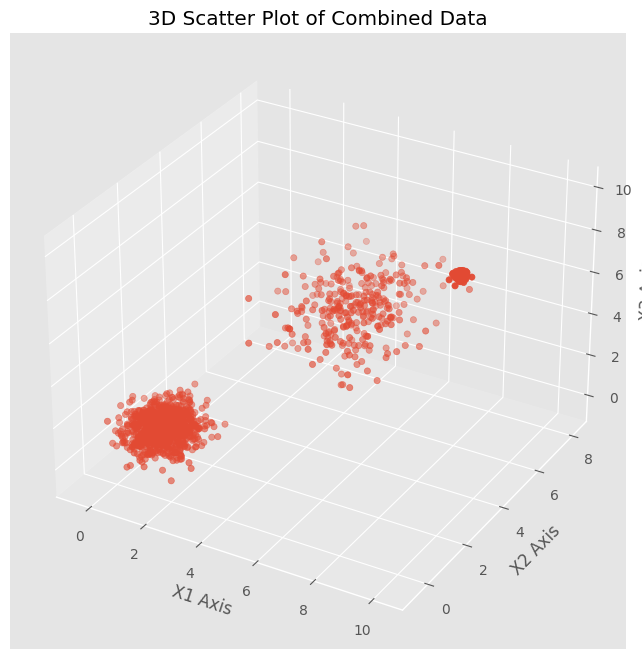

In [4]:
# Generate data
X1 = [1, 1, 1] + 0.5 * np.random.randn(1000, 3)
X2 = [5, 5, 5] + 1 * np.random.randn(300, 3)
X3 = [10, 3, 10] + 0.1 * np.random.randn(100, 3)

# Combine the datasets
X = np.vstack((X1, X2, X3))

# Setting up a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting individual coordinates for plotting
x_coords = X[:, 0]  # X-coordinates
y_coords = X[:, 1]  # Y-coordinates
z_coords = X[:, 2]  # Z-coordinates

# Plotting the data
ax.scatter(x_coords, y_coords, z_coords)

# Customizing the plot
ax.set_title('3D Scatter Plot of Combined Data')
ax.set_xlabel('X1 Axis')
ax.set_ylabel('X2 Axis')
ax.set_zlabel('X3 Axis')

# Display the plot
plt.show()


##Question 10:

Define a GMM using
gm = GaussianMixture( …..)

In [5]:
#  Define the GMM
gm = GaussianMixture(n_components=3, covariance_type='diag', max_iter=500, n_init=10, init_params='kmeans')

##Question 11:

Use the generated data to train the gmm (using the “fit” function) and analyse the
estimated model parameters (means, covariance matrices, weights).

In [6]:
# GMM fitting
print("GMM fitting: started. Please wait.")
gm.fit(X)
print("GMM fitting: Done.")

print("Convergence:", gm.converged_)

print("GMM estimated means:")
print(gm.means_)

print("GMM covariances:")
print(gm.covariances_)

print("GMM estimated weights:")
print(gm.weights_)

GMM fitting: started. Please wait.
GMM fitting: Done.
Convergence: True
GMM estimated means:
[[ 1.00708917  0.99861439  1.00947032]
 [ 5.03131019  5.00469761  5.02687563]
 [10.00359148  3.01067472  9.97861359]]
GMM covariances:
[[0.26803047 0.26093428 0.2235109 ]
 [0.94893721 1.12077996 0.97108744]
 [0.00895913 0.0128364  0.00875381]]
GMM estimated weights:
[0.71428571 0.21428572 0.07142857]


## Question 12:

Predict the labels for each of the training samples and use the predict_proba to
estimate the probabilities $\mathbf{p}_{n,k}$

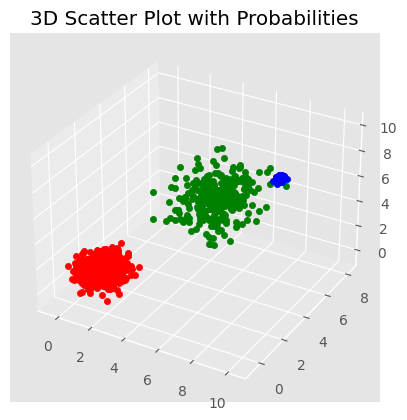

In [8]:
# Predict the labels of the training data
labels_estimated = gm.predict(X)

# Estimate the probabilities p_nk
probabilities = gm.predict_proba(X)

# Colors for the clusters
colors = 10*['r', 'g', 'b', 'c', 'k', 'y', 'm', 'orange', 'purple', 'brown']

# Setting up a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting each data point
for i in range(len(X)):
    # Select the maximum probability for the current point
    max_probability = np.max(probabilities[i])

    # Set the color based on the estimated label, with the alpha value based on the max probability
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels_estimated[i]], marker='o', alpha=max_probability)

plt.title('3D Scatter Plot with Probabilities')
plt.show()


## Question 13:

Compare GMM-based clustering and K-Means clustering when change the
parameters of the 3 original classes.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means estimated means:
[[ 1.00708917  0.9986144   1.00947033]
 [10.00359148  3.01067472  9.97861359]
 [ 5.03131026  5.00469768  5.02687571]]


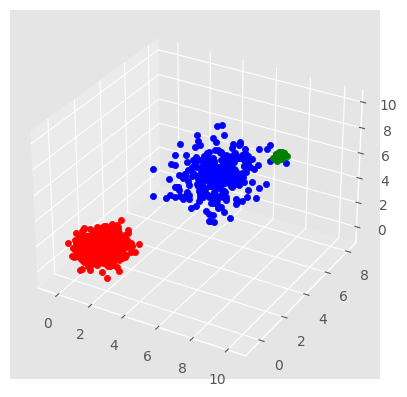

In [9]:
# Number of clusters could be set to the number of unique labels from Mean Shift
n_clusters = 3
km = KMeans(n_clusters=n_clusters)
km.fit(X)

labels_km = km.labels_
cluster_centers_km = km.cluster_centers_

print("K-means estimated means:")
print(cluster_centers_km)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0],X[i][1],X[i][2],c=colors[labels_km[i]] , marker = 'o')

plt.show()